＃ゼロから始めるディープラーニング
##　第4章　ニューラルネットワークの学習

In [1]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


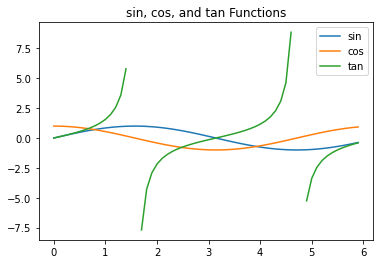

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# x軸の値を生成
x = np.arange(0, 6, 0.1)

# y軸の値を生成
y = np.sin(x)
y2 = np.cos(x)

# tan関数の発散を処理
y3 = np.tan(x)
y3[np.abs(y3) > 10] = np.nan  # 発散する部分をNaNにする

# 各曲線をプロット
plt.plot(x, y, label="sin")  # sin曲線
plt.plot(x, y2, label="cos")  # cos曲線
plt.plot(x, y3, label="tan")  # tan曲線

# グラフのタイトルと凡例を追加
plt.title("sin, cos, and tan Functions")
plt.legend()

# グラフを表示
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,2,3],[4,5,6]])
print(A)
np.ndim(A)
A.shape

B = np.array([[1,2],[3,4],[5,6]])
print(B)
B.shape

np.dot(A,B)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


array([[22, 28],
       [49, 64]])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],
               [0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])
A1 = np.dot(x,W1) + b1
print(A1)
#sigmoid関数の定義
def sigmoid(x):
  return 1/(1+np.exp(-x))

Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


(60000, 784)


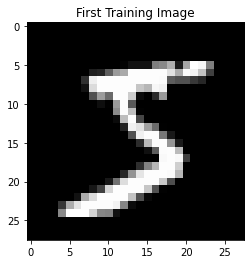

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
#sysはモジュールを読み込むためのパスを検索する。そしてその後os.pardirで親ディレクトリを取得する。その親ディレクトリの中のdatastetのmnistを読み込む。そしてそのmnist.pyを読み込んで、load_mnistというモジュールを読み込む。

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
# 最初の画像データを取得
image = x_train[0].reshape(28, 28)  # 784次元のベクトルを28×28の形に変換

# 可視化
plt.imshow(image, cmap='gray')  # グレースケールで表示
plt.title("First Training Image")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

#NumPy配列形式の画像データをPillowのImageオブジェクトに変換し、画像を表示する。
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import pickle

#sigmoid関数の定義
def sigmoid(x):
    return 1/(1+np.exp(-x))
#SoftMax関数の定義
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)

    return y

x,t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print("accuracy:"+str(float(accuracy_cnt)/len(x)))

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'